### **Logistic Regression**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

1. **훈련 세트에 대해 학습 후 변환하고 테스트 세트를 변환**
- 이 방법에서는 먼저 train_test_split을 사용하여 데이터를 훈련 및 테스트 세트로 나눕니다. 그런 다음 스케일러를 훈련 세트(X_train)에 맞추고 fit_transform을 사용하여 변환합니다. 그리고 이 학습된 스케일러를 사용하여 훈련 및 테스트 세트 모두를 변환합니다.



```python
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=0)

# 훈련 세트에 대해 학습 및 변환
X_train_scaled = scaler.fit_transform(X_train)

# 학습 세트에서 학습된 스케일러를 사용하여 테스트 세트를 변환
X_test_scaled = scaler.transform(X_test)
```

- 이 방법은 스케일링 매개변수(평균 및 표준 편차)가 훈련 데이터에서만 학습되어 데이터 누수를 방지하고 일관되게 훈련 및 테스트 세트에 적용되도록 보장합니다.

2. **전체 데이터에 대해 학습 후 변환하고 분할**

- 이 방법에서는 먼저 fit_transform을 사용하여 전체 데이터를 스케일링하고 그 후에 데이터를 훈련 및 테스트 세트로 분할합니다.

```python
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# 전체 데이터 스케일링
data_scaled = scaler.fit_transform(cancer.data)

# 스케일링된 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)
```

- **이 방법은 스케일링 매개변수가 훈련 및 테스트 데이터에서 모두 학습되므로 테스트 세트에서 정보가 스케일링 매개변수에 누출될 수 있습니다.**

> 훈련 세트에 스케일러를 맞추고 테스트 세트를 변환하는 첫 번째 방법이 일반적으로 권장되며, 테스트 세트에서의 정보 누출을 방지하여 모델을 보다 견고하게 평가할 수 있습니다.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression() # solver='lbfgs'
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                 roc_auc_score(y_test , lr_preds_proba)))

accuracy: 0.977, roc_auc:0.995


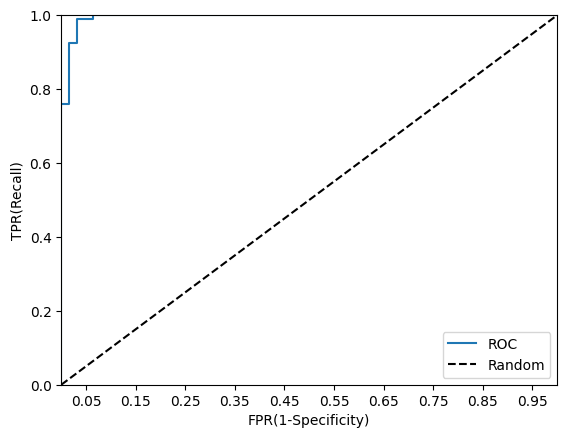

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

def roc_curve_plot(y_test, pred_proba_c1):
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  plt.plot(fprs, tprs, label = 'ROC')
  plt.plot([0,1], [0,1], 'k--', label = 'Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, lr_preds_proba)

> **LogisticRegression에서 threshold 값을 변화시키고 싶을 때**

- predict_proba 메서드를 사용하여 예측 확률을 얻은 후, 원하는 threshold로 예측을 조정할 수 있습니다.
- 기본적으로, predict_proba는 클래스 1에 대한 예측 확률을 반환하므로, 이를 기반으로 threshold를 조절하여 클래스를 예측합니다.



```python
# 코드로 형식 지정됨from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 예제 데이터 불러오기 (적절한 데이터를 사용해야 함)
# X, y = ...

# 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 확률 얻기
probabilities = model.predict_proba(X_test)[:, 1]

# Threshold 조절 (예시: 0.5를 기본으로 사용)
threshold = 0.5
predictions = np.where(probabilities > threshold, 1, 0)
# 조건이 참인 경우(예측 확률이 threshold보다 큰 경우)에는 1로 설정하고, 조건이 거짓인 경우에는 0으로 설정

# 새로운 Threshold를 적용한 모델의 정확도 계산
accuracy = np.mean(predictions == y_test)
print(f"Accuracy with threshold {threshold}: {accuracy}")
```
-  predict_proba의 결과로 얻은 예측 확률이 threshold보다 크면 해당 샘플을 클래스 1로, 그렇지 않으면 클래스 0으로 예측합니다


In [9]:
# 서로 다른 solver 값으로 LogisticRegression을 학습하고 성능 평가
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
# 여러개의 solver값 별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds_proba)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.995
solver:liblinear, accuracy: 0.982, roc_auc:0.995
solver:newton-cg, accuracy: 0.977, roc_auc:0.995
solver:sag, accuracy: 0.982, roc_auc:0.995
solver:saga, accuracy: 0.982, roc_auc:0.995


- Solver와 max_iter 외에 사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터 : penalty, c

- penalty : 규제의 유형 설정 => 'l2','l1'
- c : 규제 강도를 조절하는 alpha 값의 역수 => c가 작을수록 규제 강도는 커진다.
- **L1, L2 규제의 경우 solver 설정에 따라 영향을 받는다.**
- liblinear, saga의 경우 : 둘 다 가능
- lbfs, newton-cg, sag : L2 만 가능

In [10]:
# GridSearchCV를 이용해 solver, penalty, c를 최적화
from sklearn.model_selection import GridSearchCV

params = {'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

### **정리**
- 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어나다
- 이 때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많다
- data set 분류에도 뛰어난 성능을 보여서, 텍스트 분류에도 자주 사용되는 model

### **RegressionTree**

- 이전까지의 회귀는 회귀 계수를 기반으로 하는 최적 회귀 함수를 도출하는 것이 주요 목표
- 회귀 트리는 회귀 함수를 기반으로 하지 않고, 결정 트리를 기반으로 하는 회귀 방식

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
bostonDF = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/boston_house_price.csv')
bostonDF.drop(columns='CAT.MEDV', inplace = True)
bostonDF.rename(columns={'MEDV': 'PRICE'}, inplace=True)
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
#사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [18]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

- 회귀 트리 regressor 클래스는 회귀 계수를 제공하는 coef_ 속성이 없다.
- 대신 feature_importances_를 이용해 feature별 중요도를 알 수는 있다.

<Axes: xlabel='None', ylabel='None'>

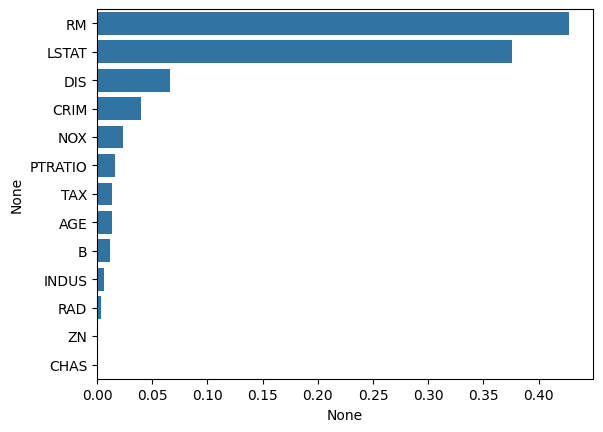

In [23]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


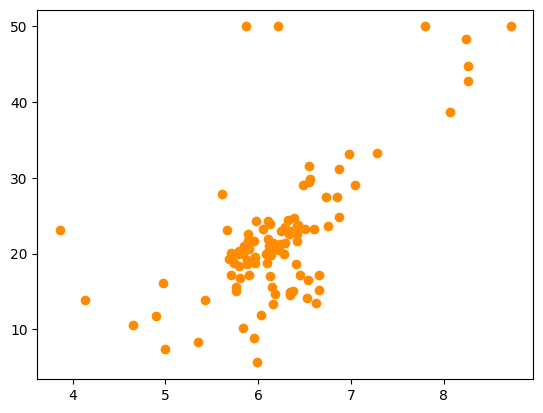

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

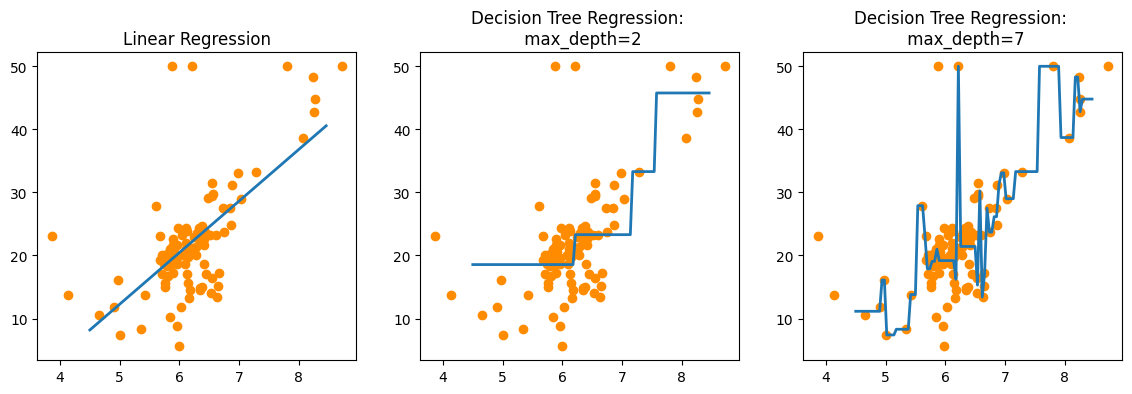

In [26]:
# 예측된 Price 회귀선 그려보기
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

=> 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다.

- but, DecisionTree regressor의 max_depth = 7인 경우, 이상치 data도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 model이 되었다.